Epoch 1, Loss: 1.7041343450546265, Val Loss: 3.323359489440918
Epoch 2, Loss: 1.0941879749298096, Val Loss: 2.133793592453003
Epoch 3, Loss: 0.7025230526924133, Val Loss: 1.3703017234802246
Epoch 4, Loss: 0.45117512345314026, Val Loss: 0.8805556893348694
Epoch 5, Loss: 0.2899986207485199, Val Loss: 0.5666365623474121
Epoch 6, Loss: 0.1867457777261734, Val Loss: 0.36561089754104614
Epoch 7, Loss: 0.12068338692188263, Val Loss: 0.23703759908676147
Epoch 8, Loss: 0.07848349958658218, Val Loss: 0.15493421256542206
Epoch 9, Loss: 0.051582060754299164, Val Loss: 0.10261295735836029
Epoch 10, Loss: 0.034478235989809036, Val Loss: 0.06936000287532806
Epoch 11, Loss: 0.023640578612685204, Val Loss: 0.048300109803676605
Epoch 12, Loss: 0.016803640872240067, Val Loss: 0.035023823380470276
Epoch 13, Loss: 0.012515398673713207, Val Loss: 0.026705782860517502
Epoch 14, Loss: 0.009846173226833344, Val Loss: 0.021537315100431442
Epoch 15, Loss: 0.008201630786061287, Val Loss: 0.018362125381827354
Epoc

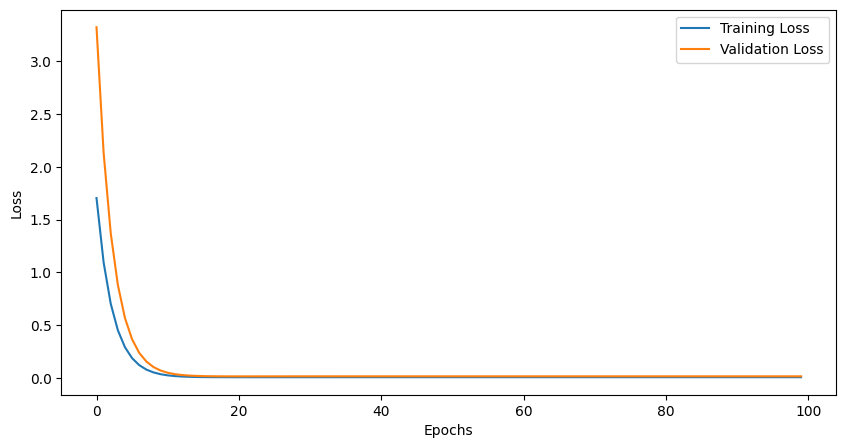

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(1, 1)  # A simple linear layer

    def forward(self, x):
        return self.fc(x)

# Create the model
model = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Create some dummy data for training and validation
x_train = torch.randn(100, 1)
y_train = x_train * 2 + torch.randn(100, 1) * 0.1
x_val = torch.randn(20, 1)
y_val = x_val * 2 + torch.randn(20, 1) * 0.1

# Create data loaders
train_loader = DataLoader(TensorDataset(x_train, y_train), batch_size=10)
val_loader = DataLoader(TensorDataset(x_val, y_val), batch_size=10)

# Prepare lists to save the losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(100):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        val_loss = sum(criterion(model(inputs), targets) for inputs, targets in val_loader)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Val Loss: {val_loss.item()}")

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Test input: 1.820870041847229, Test output: 3.6535887718200684


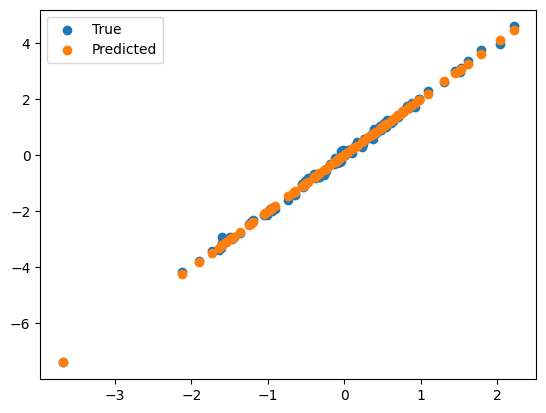

In [4]:
# Save the model
torch.save(model.state_dict(), 'model.pth')

# Load the model
model = Net()
model.load_state_dict(torch.load('model.pth'))

# Test the model
x_test = torch.randn(1, 1)
y_test = model(x_test)
print(f"Test input: {x_test.item()}, Test output: {y_test.item()}")

# Plot the model predictions against the true values
plt.scatter(x_train, y_train, label='True')
plt.scatter(x_train, model(x_train).detach(), label='Predicted')
plt.legend()
plt.show()